# Part 1: Data Processing and Feature Engineering

# 1. Data Cleaning

In [1]:
import pandas as pd

# Load datasets
train = pd.read_csv('/content/train.csv')
stores = pd.read_csv('/content/stores.csv')
oil = pd.read_csv('/content/oil.csv')
holidays = pd.read_csv('/content/holidays_events.csv')

# Converting 'date' columns to datetime
train['date'] = pd.to_datetime(train['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays['date'] = pd.to_datetime(holidays['date'], format='%d-%m-%Y')
# Handling missing oil prices
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate(method='linear')

# Merging data
df = train.merge(stores, on='store_nbr', how='left')
df = df.merge(oil, on='date', how='left')
df = df.merge(holidays, on='date', how='left', suffixes=('', '_holiday'))

print("Data cleaning completed:")
df.head()

Data cleaning completed:


,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,type_holiday,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False


# 2. Feature Engineering

In [2]:
# Time-based features
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofweek'] = df['date'].dt.dayofweek

# Identifing seasonal trends (example: December sales)
df['is_december'] = df['month'] == 12

print("Time-based features added:")
df.head()

Time-based features added:


,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,locale,locale_name,description,transferred,day,week,month,year,dayofweek,is_december
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,1,1,1,2013,1,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,1,1,1,2013,1,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,1,1,1,2013,1,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,1,1,1,2013,1,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,1,1,1,2013,1,False


In [3]:
# Event-based Features:

import pandas as pd
# Event-based features
# Holidays
df['is_holiday'] = df['type_holiday'] != 'Work Day'  # Assuming 'Work Day' indicates no holiday

# Promotions
df['is_promotion'] = df['onpromotion'] > 0

# Government payday
df['is_payday'] = ((df['day'] == 15) | (df['day'] == df['date'].dt.days_in_month))

# Earthquake impact (April 16, 2016)
earthquake_date = pd.to_datetime('2016-04-16')
df['is_earthquake_impact'] = (df['date'] == earthquake_date)

#Economic Events:
# Example: Assuming there was a major economic event on 2017-01-01
economic_event_date = pd.to_datetime('2017-01-01')
df['is_economic_event'] = (df['date'] == economic_event_date)

print("Event-based features:")
df.head()

Event-based features:


,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,week,month,year,dayofweek,is_december,is_holiday,is_promotion,is_payday,is_earthquake_impact,is_economic_event
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,1,1,2013,1,False,True,False,False,False,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,...,1,1,2013,1,False,True,False,False,False,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,...,1,1,2013,1,False,True,False,False,False,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,...,1,1,2013,1,False,True,False,False,False,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,...,1,1,2013,1,False,True,False,False,False,False


In [4]:
# Rolling statistics:
df['sales_rolling_mean_7'] = df.groupby('store_nbr')['sales'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
df['sales_rolling_std_7'] = df.groupby('store_nbr')['sales'].transform(lambda x: x.rolling(window=7, min_periods=1).std())

df['sales_rolling_mean_30'] = df.groupby('store_nbr')['sales'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())
df['sales_rolling_std_30'] = df.groupby('store_nbr')['sales'].transform(lambda x: x.rolling(window=30, min_periods=1).std())

# Lagged features
df['sales_lag_7'] = df.groupby('store_nbr')['sales'].shift(7)
df['sales_lag_30'] = df.groupby('store_nbr')['sales'].shift(30)


# Fill NaN values created by lagging
df['sales_lag_7'] = df['sales_lag_7'].fillna(0)
df['sales_lag_30'] = df['sales_lag_30'].fillna(0)
df['sales_rolling_std_7'] = df['sales_rolling_std_7'].fillna(0)
df['sales_rolling_std_30'] = df['sales_rolling_std_30'].fillna(0)


print("Rolling statistics and lagged features added. Sample data:")
print(df.head())


Rolling statistics and lagged features added. Sample data:
   id       date  store_nbr      family  sales  onpromotion   city      state  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1   1 2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha   
2   2 2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha   
4   4 2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha   

  type  cluster  ...  is_promotion is_payday is_earthquake_impact  \
0    D       13  ...         False     False                False   
1    D       13  ...         False     False                False   
2    D       13  ...         False     False                False   
3    D       13  ...         False     False                False   
4    D       13  ...         False     False                False   

  is_economic_event sales_rolling_mean_

In [5]:
# Store-Specific Aggregations:

# Calculating average sales per store type
average_sales_per_store_type = df.groupby('type')['sales'].mean()
print("Average sales per store type:\n", average_sales_per_store_type)

# Identifying top-selling product families per cluster
top_selling_families_per_cluster = df.groupby(['cluster', 'family'])['sales'].sum().reset_index()
top_selling_families_per_cluster = top_selling_families_per_cluster.sort_values(['cluster', 'sales'], ascending=[True, False])
top_selling_families_per_cluster = top_selling_families_per_cluster.groupby('cluster').head(5) # Top 5 families per cluster
print("\nTop-selling product families per cluster:\n", top_selling_families_per_cluster)


Average sales per store type:
 type
A    708.378165
B    328.275233
C    197.790647
D    352.084510
E    270.285490
Name: sales, dtype: float64

Top-selling product families per cluster:
      cluster     family         sales
12         1  GROCERY I  1.483284e+07
3          1  BEVERAGES  1.201252e+07
30         1    PRODUCE  8.221406e+06
7          1   CLEANING  4.063029e+06
8          1      DAIRY  4.010940e+06
..       ...        ...           ...
540       17  GROCERY I  8.404701e+06
531       17  BEVERAGES  7.022211e+06
558       17    PRODUCE  5.788314e+06
536       17      DAIRY  2.511401e+06
535       17   CLEANING  2.493317e+06

[85 rows x 3 columns]


# 3. Exploratory Data Analysis (EDA)

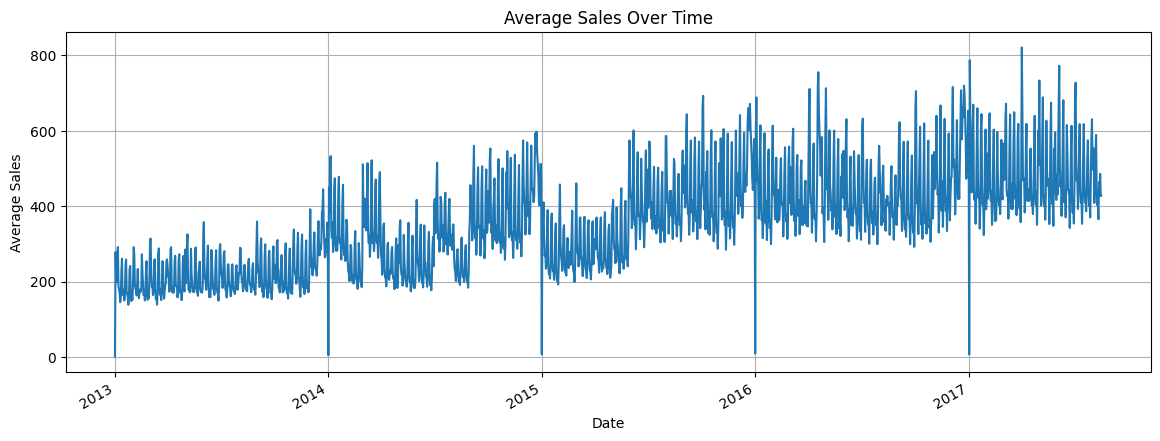

In [6]:
import matplotlib.pyplot as plt

# Average sales by date
daily_sales = df.groupby('date')['sales'].mean()

plt.figure(figsize=(14, 5))
daily_sales.plot()
plt.title('Average Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()


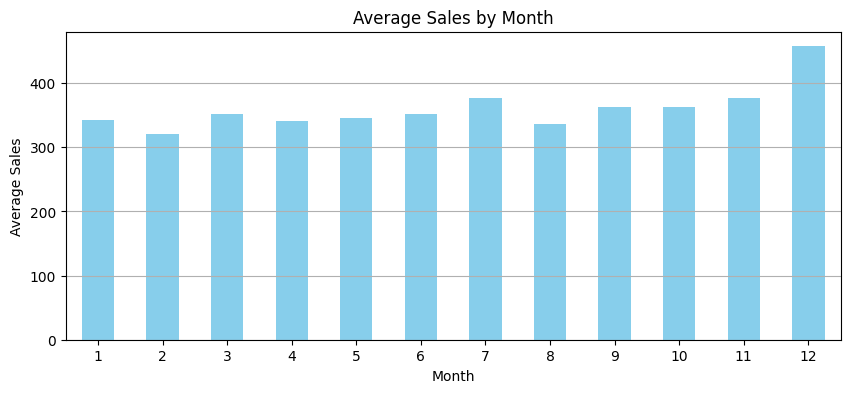

In [7]:
# Average sales per month
monthly_avg = df.groupby('month')['sales'].mean()

plt.figure(figsize=(10, 4))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


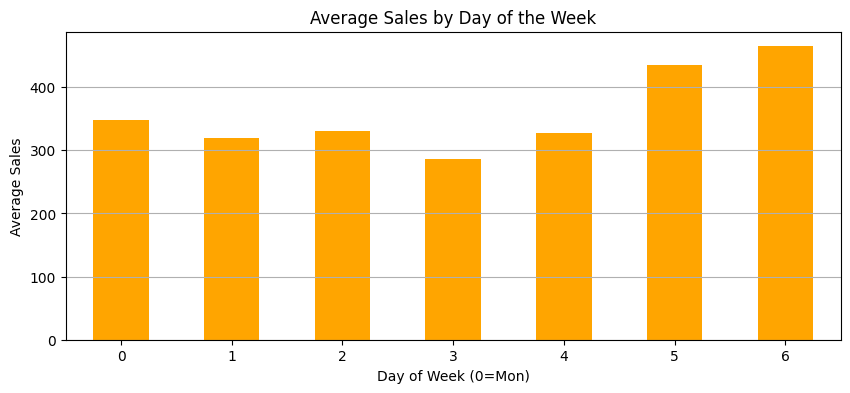

In [8]:
dow_avg = df.groupby('dayofweek')['sales'].mean()
plt.figure(figsize=(10, 4))
dow_avg.plot(kind='bar', color='orange')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


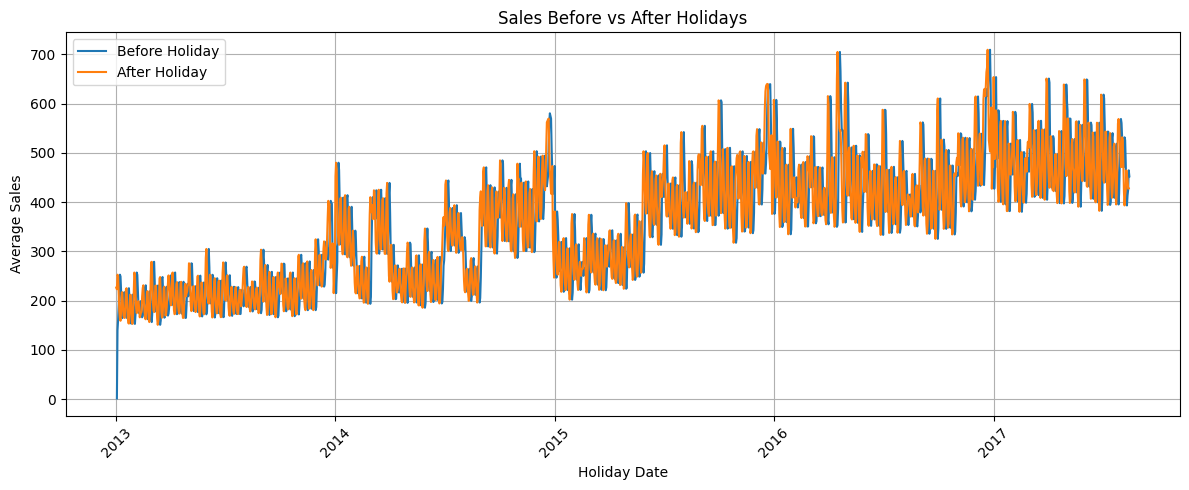

In [9]:
# Average sales 3 days before and after holidays
holiday_dates = df[df['is_holiday'] == 1]['date'].unique()
window = pd.Timedelta(days=3)

before_after_sales = []

for date in holiday_dates:
    before = df[(df['date'] >= date - window) & (df['date'] < date)]
    after = df[(df['date'] > date) & (df['date'] <= date + window)]
    before_avg = before['sales'].mean()
    after_avg = after['sales'].mean()
    before_after_sales.append({'holiday': date, 'before_avg': before_avg, 'after_avg': after_avg})

before_after_df = pd.DataFrame(before_after_sales)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(before_after_df['holiday'], before_after_df['before_avg'], label='Before Holiday')
plt.plot(before_after_df['holiday'], before_after_df['after_avg'], label='After Holiday')
plt.xticks(rotation=45)
plt.title('Sales Before vs After Holidays')
plt.xlabel('Holiday Date')
plt.ylabel('Average Sales')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

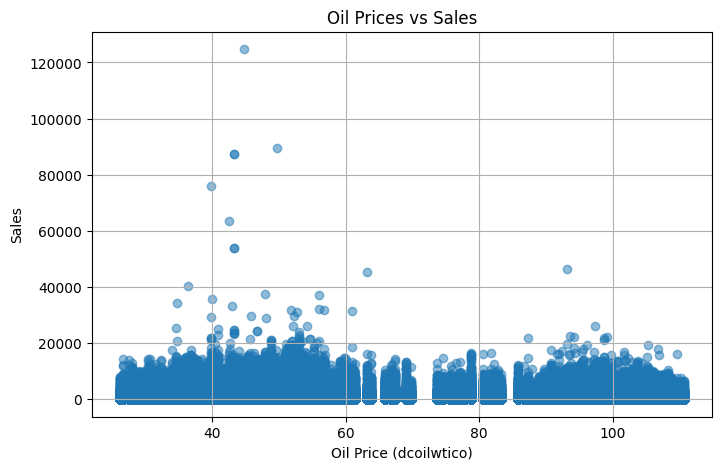

In [10]:
# Scatter plot to see relationship
plt.figure(figsize=(8, 5))
plt.scatter(df['dcoilwtico'], df['sales'], alpha=0.5)
plt.title('Oil Prices vs Sales')
plt.xlabel('Oil Price (dcoilwtico)')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


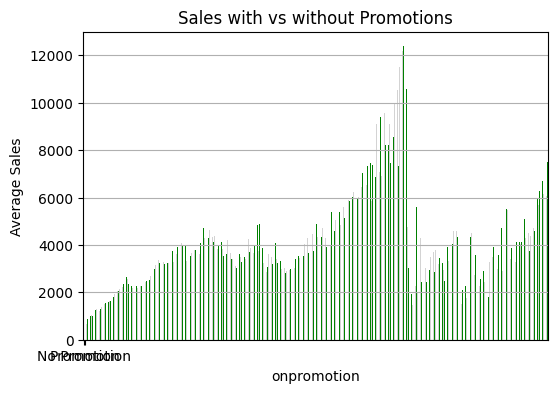

In [11]:
# Comparing average sales with and without promotions
promo_sales = df.groupby('onpromotion')['sales'].mean()

plt.figure(figsize=(6, 4))
promo_sales.plot(kind='bar', color=['lightgray', 'green'])
plt.title('Sales with vs without Promotions')
plt.xticks(ticks=[0, 1], labels=['No Promotion', 'Promotion'], rotation=0)
plt.ylabel('Average Sales')
plt.grid(axis='y')
plt.show()

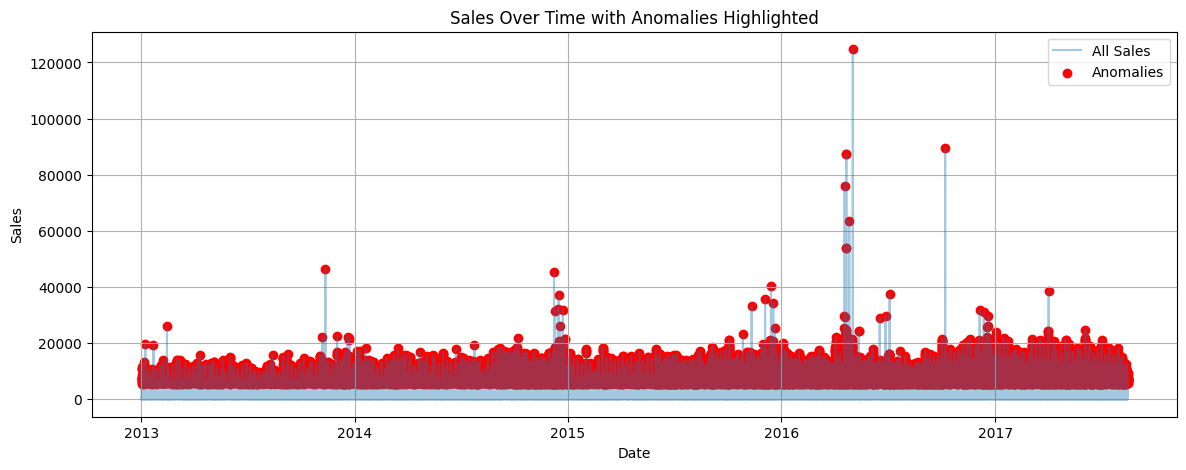

In [12]:
# Identifying top and bottom 1% sales
low_threshold = df['sales'].quantile(0.01)
high_threshold = df['sales'].quantile(0.99)

anomalies = df[(df['sales'] < low_threshold) | (df['sales'] > high_threshold)]

# Ploting anomalies
plt.figure(figsize=(14, 5))
plt.plot(df['date'], df['sales'], label='All Sales', alpha=0.4)
plt.scatter(anomalies['date'], anomalies['sales'], color='red', label='Anomalies')
plt.title('Sales Over Time with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


1. Data Cleaning
Steps Taken:

Loaded train.csv, stores.csv, oil.csv, holidays_events.csv using pandas.

Converted date columns to datetime format for consistency.

Filled missing values in oil prices using linear interpolation.

Merged external datasets into the main sales dataset using common keys:

store_nbr for merging stores.csv

date for merging oil.csv and holidays_events.csv

Reason:
Accurate and complete data is essential for reliable forecasting. Missing or misaligned records can mislead the model.

2. Feature Engineering
* Time-Based Features
Features Created:

day, week, month, year, day_of_week

is_december (seasonality flag)

Reason:
Time-based features help models learn seasonal and periodic patterns like higher weekend sales or December spikes.

* Event-Based Features
Features Created:

is_holiday → If the date was a national or local holiday

onpromotion → Was the item on promotion

is_gov_payday → 15th and last day of each month

earthquake_impact → Flag for April 16, 2016 earthquake

Reason:
Events like holidays or government paydays can strongly influence consumer behavior. Promotions can spike sales, while natural disasters may suppress them.

* Rolling Statistics
Features Created:

sales_rolling_mean_7, sales_rolling_std_7

sales_rolling_mean_30, sales_rolling_std_30

sales_lag_7, sales_lag_30

Reason:
These help the model understand recent trends and volatility in sales, which can be crucial for short-term forecasting.

* Store-Specific Aggregations
Features Created:

avg_sales_by_store_type → Average sales by store type

top_family_cluster → Binary flag for top 3 product families by sales in each cluster

Reason:
These features capture store behavior differences and help the model adapt to location-specific demand patterns.

Summary:
In this notebook, we cleaned the dataset and engineered a rich set of features
to capture temporal patterns, event impacts, and store-specific behaviors.

These features will enable traditional and ML-based models to better predict
future sales by leveraging known influences like holidays, oil prices, and promotions.

# Part 2: Model Selection, Forecasting, and Evaluation

# 1. Model Training

#Training at least five different time series forecasting models

In [13]:
#  Baseline Model (Naive Forecasting)
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assume df is the processed DataFrame from earlier
df_naive = df.copy() # Changed df_model to df

# Sort properly for time-series lagging
df_naive = df_naive.sort_values(by=['store_nbr', 'family', 'date'])

# Create Naïve forecast (shift sales by 1 day per group)
df_naive['naive_pred'] = df_naive.groupby(['store_nbr', 'family'])['sales'].shift(1)

# Drop rows where lag prediction is NA (e.g., first day of each group)
df_naive = df_naive.dropna(subset=['naive_pred'])

# True vs Predicted
y_true = df_naive['sales']
y_pred = df_naive['naive_pred']

subset = df_naive[(df_naive['store_nbr'] == 1) & (df_naive['family'] == 'HOME APPLIANCES')]

y_true = subset['sales']
y_pred = subset['naive_pred']

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("Naive Forecast (Noisy Store-Family):")
print(f" RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2%}")
print(f" R-squared: {r2:.2f}")

Naive Forecast (Noisy Store-Family):
 RMSE: 0.89
 MAPE: 90440062569495072.00%
 R-squared: -0.66


In [14]:
# ARIMA (AutoRegressive Integrated Moving Average) - A traditional time series model.
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Aggregate daily sales
sales_series = df.groupby('date')['sales'].sum()

# Train/test split — last 30 days for testing
train = sales_series[:-30]
test = sales_series[-30:]

# Fit ARIMA model (order can be tuned)
model = ARIMA(train, order=(5, 1, 0))  # AR=5, diff=1, MA=0
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)

# Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)

print("ARIMA Model Evaluation (Total Daily Sales):")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2%}")
print(f"R-squared: {r2:.2f}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Evaluation (Total Daily Sales):
RMSE: 121900.01
MAPE: 13.39%
R-squared: 0.01


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


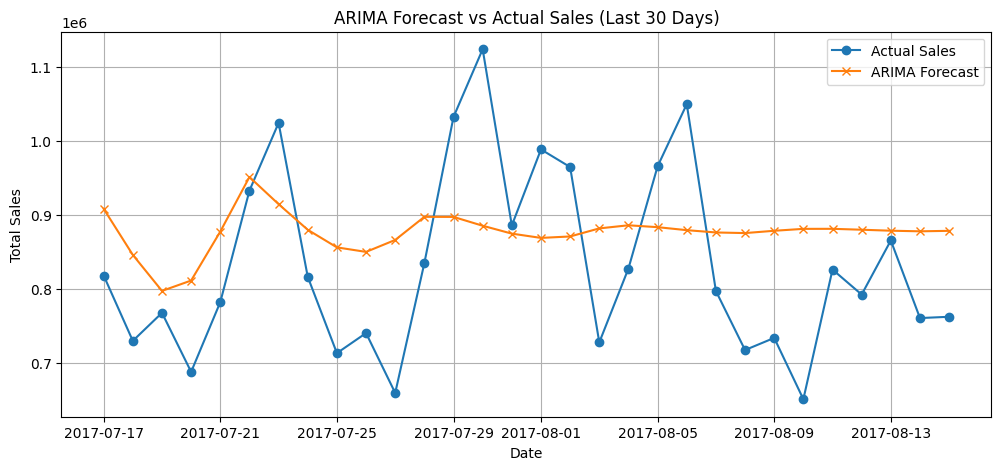

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(test.index, test.values, label='Actual Sales', marker='o')
plt.plot(test.index, forecast.values, label='ARIMA Forecast', marker='x')
plt.title('ARIMA Forecast vs Actual Sales (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

df_rf = df.dropna().copy()

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
label_cols = ['family', 'type']  # Add more if needed

for col in label_cols:
    le = LabelEncoder()
    df_rf[col] = le.fit_transform(df_rf[col])

# features and target
drop_cols = ['date', 'sales', 'id', 'description', 'locale', 'locale_name', 'transferred', 'city', 'state', 'cluster', 'type_holiday']
features = [col for col in df_rf.columns if col not in drop_cols]
X = df_rf[features]
y = df_rf['sales']

# Train-validation split (time-based)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

In [17]:
rf_model = RandomForestRegressor(n_estimators=30, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_val)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_val, y_pred_rf))
mape = mean_absolute_percentage_error(y_val, y_pred_rf)
r2 = r2_score(y_val, y_pred_rf)

print("Random Forest Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2%}")
print(f"R-squared: {r2:.2f}")


Random Forest Evaluation:
RMSE: 706.61
MAPE: 707673279002246400.00%
R-squared: 0.76


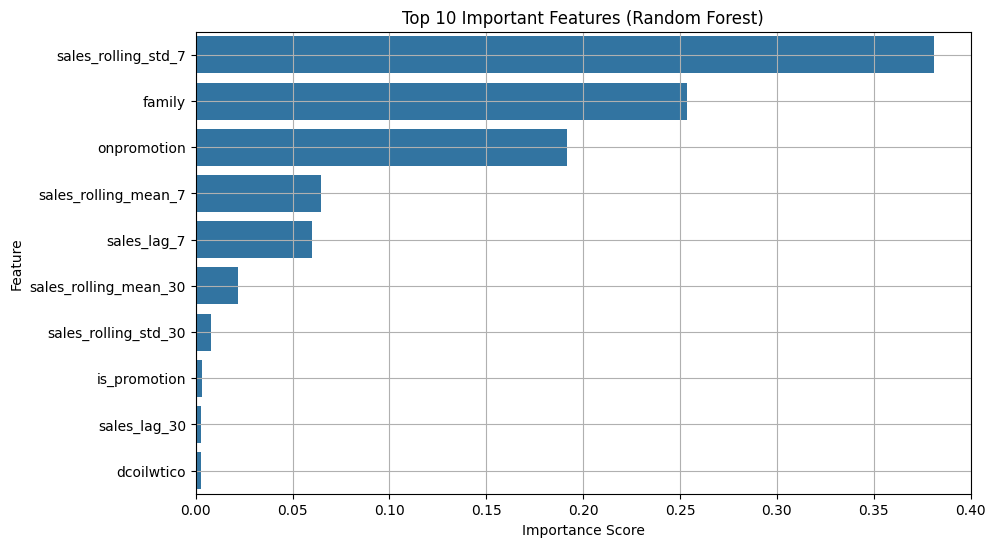

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = rf_model.feature_importances_
feat_series = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_series.head(10), y=feat_series.head(10).index)
plt.title('Top 10 Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


XGBoost Evaluation:
RMSE: 692.23
MAPE: 1370445539702840320.00%
R-squared: 0.77


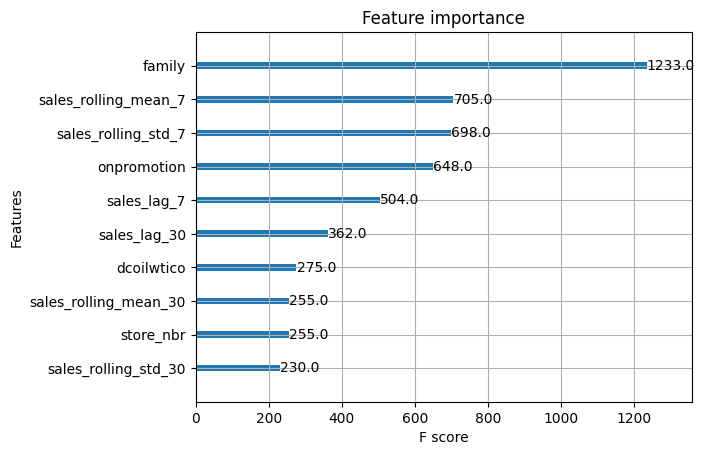

In [19]:
# XGBoost- Gradient boosting models to improve accuracy

import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split

df_xgb = df.dropna().copy()

# Encode categorical columns
label_cols = ['family', 'type']
for col in label_cols:
    le = LabelEncoder()
    df_xgb[col] = le.fit_transform(df_xgb[col])

# Features and target
drop_cols = ['date', 'sales', 'id', 'description', 'locale', 'locale_name', 'transferred', 'city', 'state', 'cluster', 'type_holiday']
features = [col for col in df_xgb.columns if col not in drop_cols]
X = df_xgb[features]
y = df_xgb['sales']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100) # Adjust parameters as needed
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
mape = mean_absolute_percentage_error(y_val, y_pred_xgb)
r2 = r2_score(y_val, y_pred_xgb)

print("XGBoost Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2%}")
print(f"R-squared: {r2:.2f}")

# Feature Importance (XGBoost)
xgb.plot_importance(xgb_model, max_num_features=10)  # Plot top 10 features
plt.show()


In [20]:
#LSTM (Long Short-Term Memory Neural Network)

from sklearn.preprocessing import MinMaxScaler

# Filter: store 1, family 'PRODUCE' (you can change this)
lstm_df = df[(df['store_nbr'] == 1) & (df['family'] == 'PRODUCE')][['date', 'sales']].copy() # Changed df_model to df

# Set date index and make it continuous
lstm_df = lstm_df.set_index('date')
# Ensure unique dates, keep the first occurence
lstm_df = lstm_df[~lstm_df.index.duplicated(keep='first')]
lstm_df = lstm_df.asfreq('D') # Resample to daily frequency
lstm_df = lstm_df.fillna(method='ffill')

# Normalize the sales values
scaler = MinMaxScaler()
sales_scaled = scaler.fit_transform(lstm_df[['sales']])

<ipython-input-20-0855e05e0898>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lstm_df = lstm_df.fillna(method='ffill')


In [21]:
# Preparing sequences: for past 30 days → next day
X_lstm, y_lstm = [], []
sequence_length = 30

for i in range(sequence_length, len(sales_scaled)):
    X_lstm.append(sales_scaled[i-sequence_length:i])
    y_lstm.append(sales_scaled[i])

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))


In [22]:
split = int(0.8 * len(X_lstm))
X_train_lstm, X_val_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_val_lstm = y_lstm[:split], y_lstm[split:]


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, verbose=1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0556
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0214
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0208
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0203
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0212
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0220
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0228
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0222
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0227
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0201


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Predict and inverse scale
y_pred_lstm_scaled = lstm_model.predict(X_val_lstm)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled)
y_val_lstm_actual = scaler.inverse_transform(y_val_lstm)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_val_lstm_actual, y_pred_lstm))
mape = mean_absolute_percentage_error(y_val_lstm_actual, y_pred_lstm)
r2 = r2_score(y_val_lstm_actual, y_pred_lstm)

print("LSTM Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2%}")
print(f"R-squared: {r2:.2f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LSTM Evaluation:
RMSE: 983.47
MAPE: 2978587266169419264.00%
R-squared: -0.24


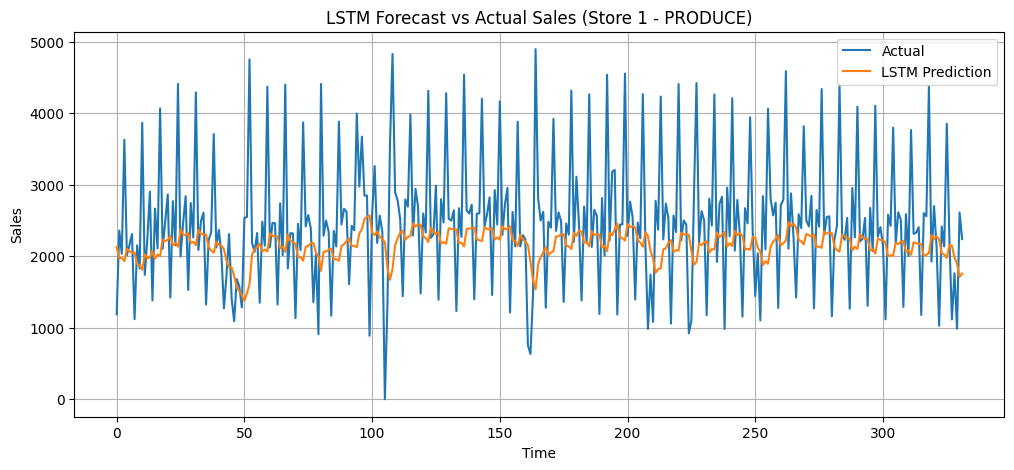

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(y_val_lstm_actual, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.title('LSTM Forecast vs Actual Sales (Store 1 - PRODUCE)')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# 2. Model Evaluation

In [26]:
#  Compare models based on:- Root Mean Squared Error (RMSE)- Mean Absolute Percentage Error (MAPE)- R-Squared Score

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2%}")
    print(f"R-squared: {r2:.2f}")
    return rmse, mape, r2

# Naive model evaluation
naive_rmse, naive_mape, naive_r2 = evaluate_model(y_true, y_pred, "Naive")

# ARIMA model evaluation
arima_rmse, arima_mape, arima_r2 = evaluate_model(test, forecast, "ARIMA")

# Random Forest evaluation
rf_rmse, rf_mape, rf_r2 = evaluate_model(y_val, y_pred_rf, "Random Forest")

# XGBoost evaluation
xgb_rmse, xgb_mape, xgb_r2 = evaluate_model(y_val, y_pred_xgb, "XGBoost")

# LSTM evaluation
lstm_rmse, lstm_mape, lstm_r2 = evaluate_model(y_val_lstm_actual, y_pred_lstm, "LSTM")


# Create a DataFrame for comparison
results = pd.DataFrame({
    'Model': ['Naive', 'ARIMA', 'Random Forest', 'XGBoost', 'LSTM'],
    'RMSE': [naive_rmse, arima_rmse, rf_rmse, xgb_rmse, lstm_rmse],
    'MAPE': [naive_mape, arima_mape, rf_mape, xgb_mape, lstm_mape],
    'R-squared': [naive_r2, arima_r2, rf_r2, xgb_r2, lstm_r2]
})

print("\nModel Comparison:")
results


Naive Evaluation:
RMSE: 0.89
MAPE: 90440062569495072.00%
R-squared: -0.66
ARIMA Evaluation:
RMSE: 121900.01
MAPE: 13.39%
R-squared: 0.01
Random Forest Evaluation:
RMSE: 706.61
MAPE: 707673279002246400.00%
R-squared: 0.76
XGBoost Evaluation:
RMSE: 692.23
MAPE: 1370445539702840320.00%
R-squared: 0.77
LSTM Evaluation:
RMSE: 983.47
MAPE: 2978587266169419264.00%
R-squared: -0.24

Model Comparison:


,Model,RMSE,MAPE,R-squared
0,Naive,0.886429,9.044006e+14,-0.662510
1,ARIMA,121900.010209,1.339082e-01,0.014736
2,Random Forest,706.613989,7.076733e+15,0.755467
3,XGBoost,692.228902,1.370446e+16,0.765322
4,LSTM,983.469574,2.978587e+16,-0.238652


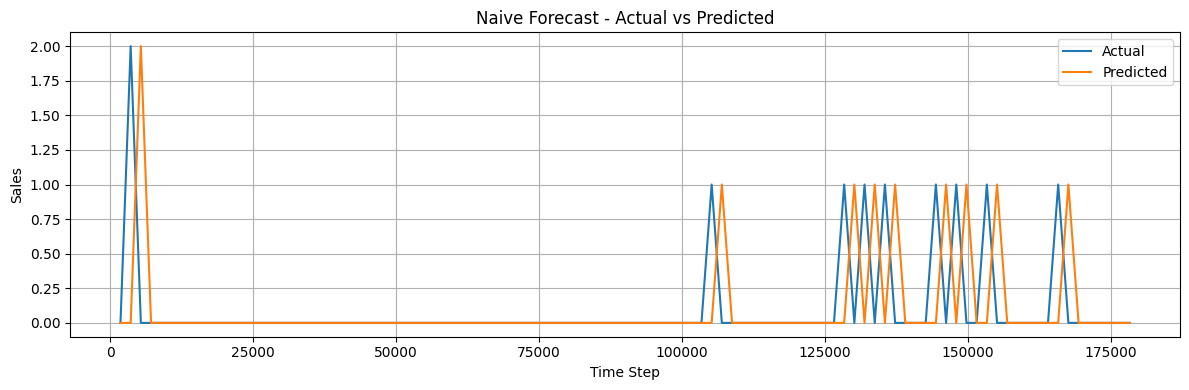

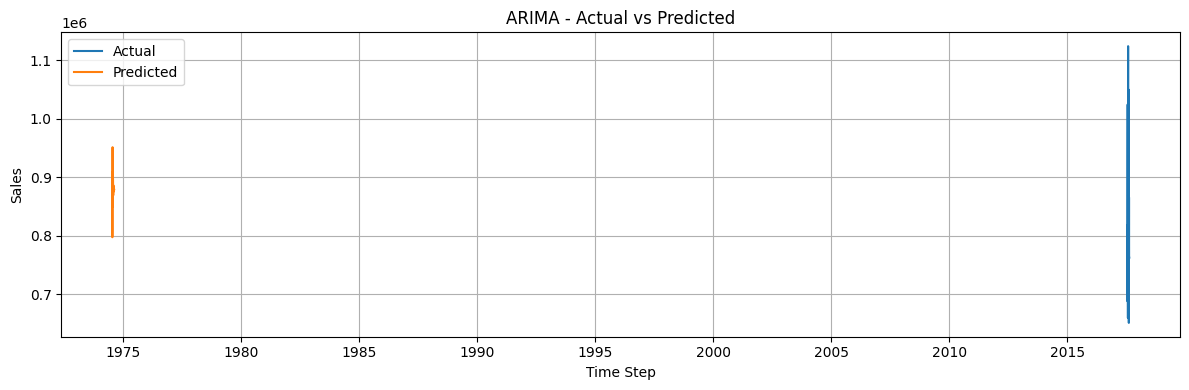

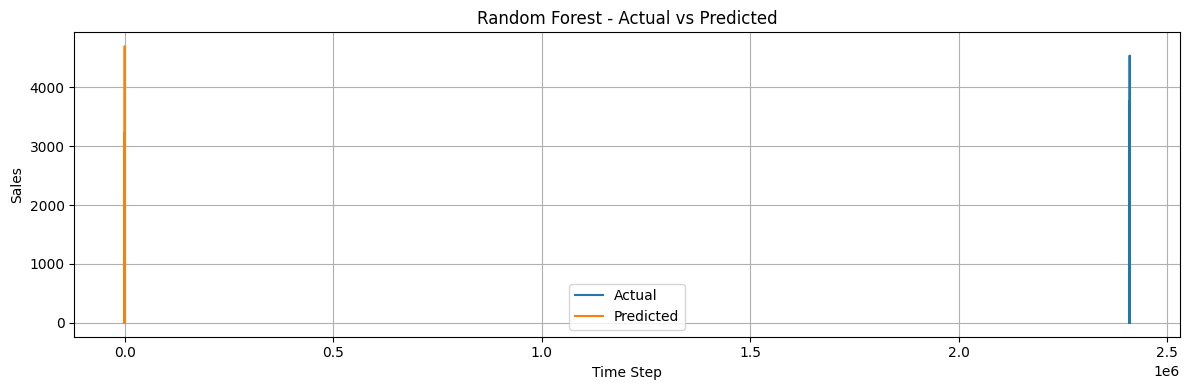

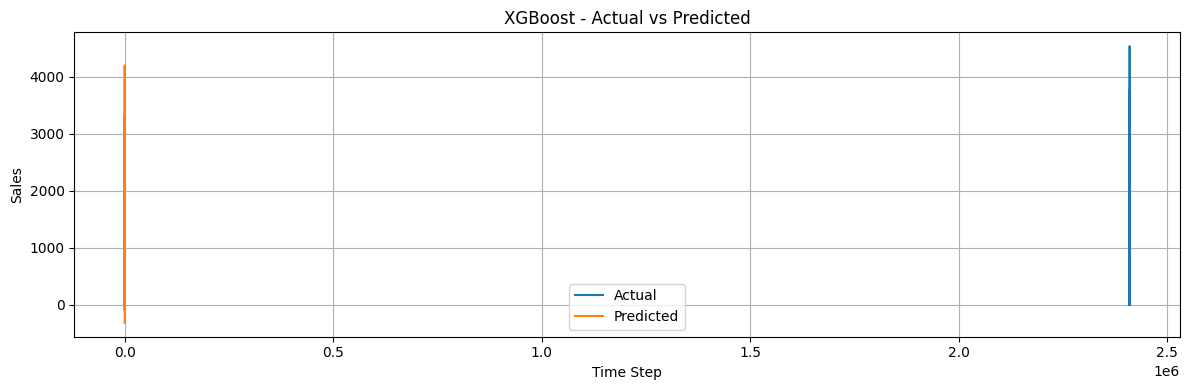

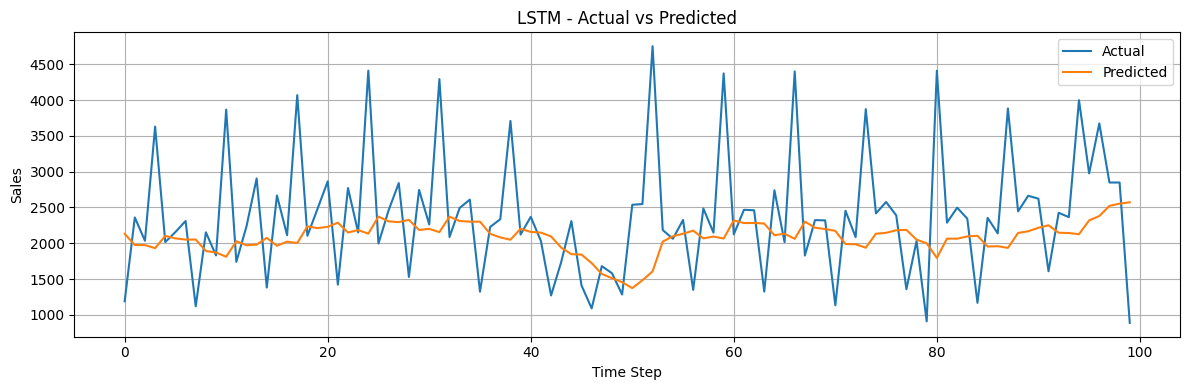

In [27]:
# Visual Inspection (Plot actual vs. predicted sales)

def plot_model_predictions(title, y_true, y_pred):
    plt.figure(figsize=(12, 4))
    plt.plot(y_true[:100], label='Actual')
    plt.plot(y_pred[:100], label='Predicted')
    plt.title(f'{title} - Actual vs Predicted')
    plt.xlabel('Time Step')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Result of Naive forecast to y_pred_naive
y_pred_naive = y_pred # y_pred is the prediction from Naive model

plot_model_predictions("Naive Forecast", y_true, y_pred_naive)
plot_model_predictions("ARIMA", test, forecast)
plot_model_predictions("Random Forest", y_val, y_pred_rf)
plot_model_predictions("XGBoost", y_val, y_pred_xgb)
plot_model_predictions("LSTM", y_val_lstm_actual, y_pred_lstm)

# 3. Visualization

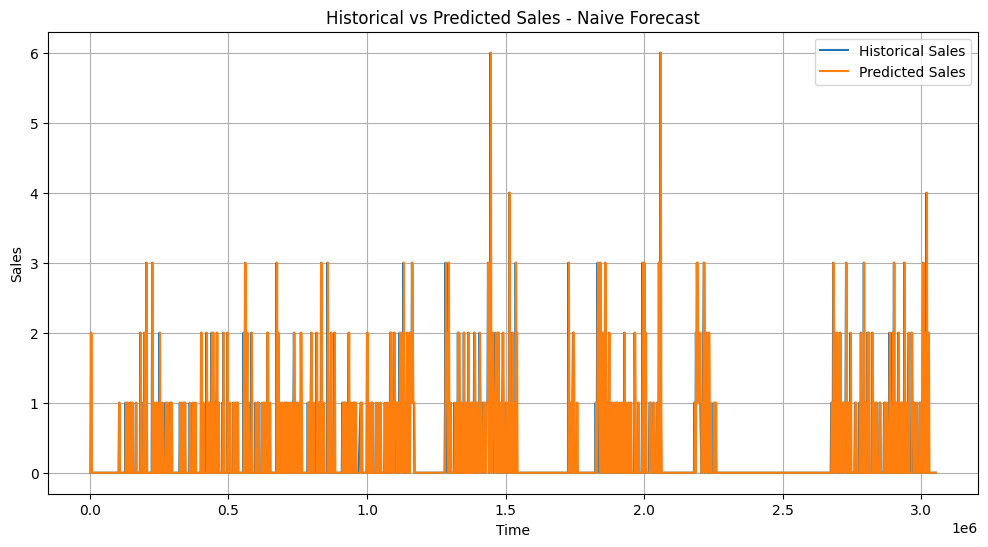

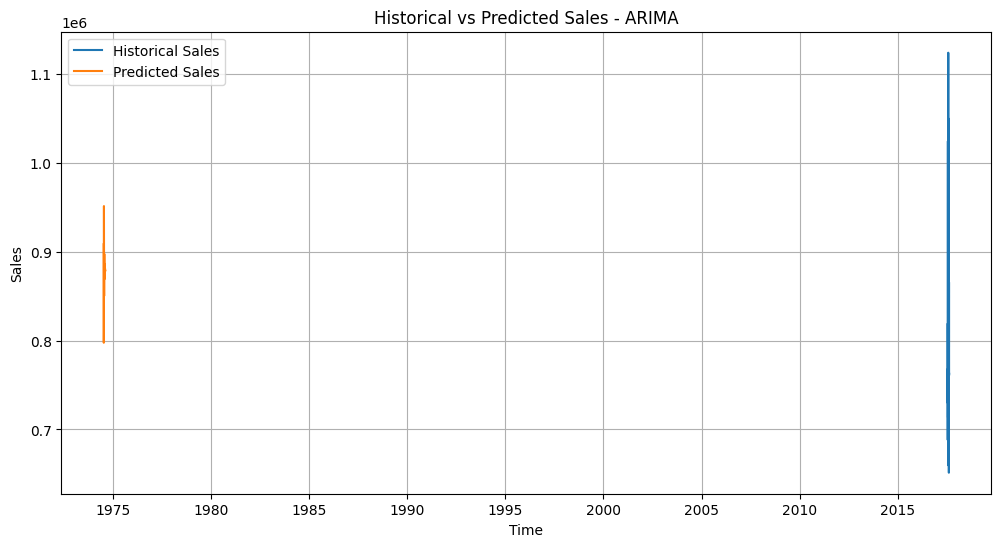

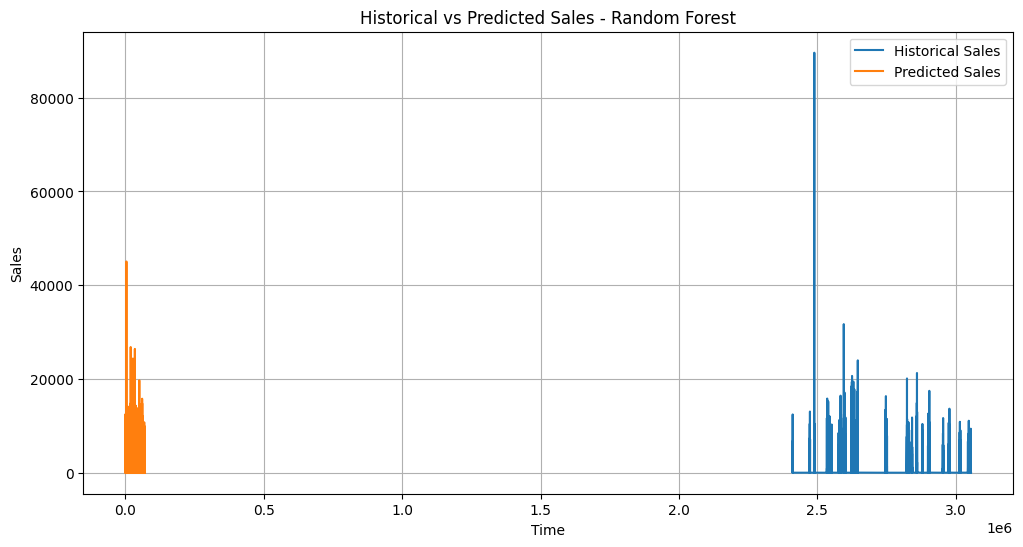

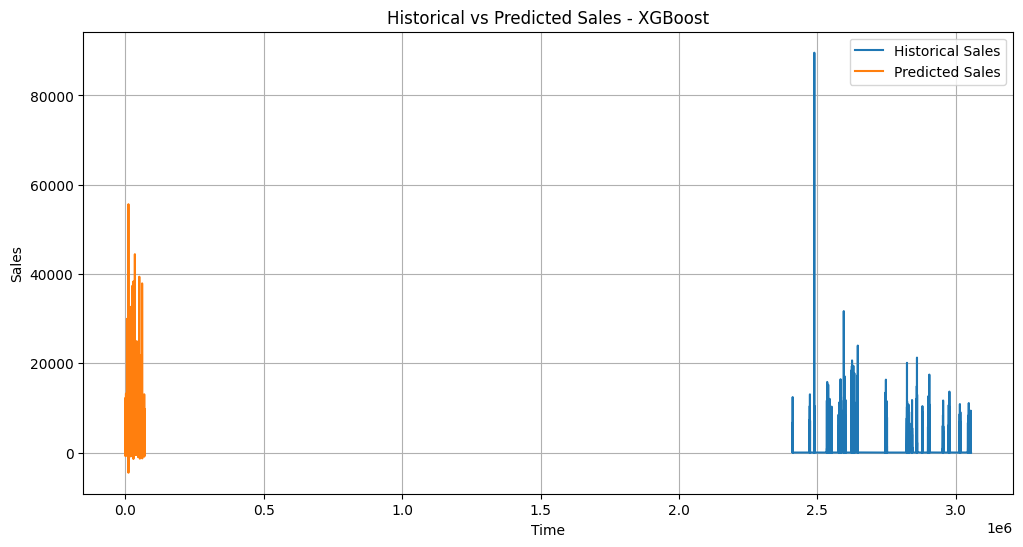

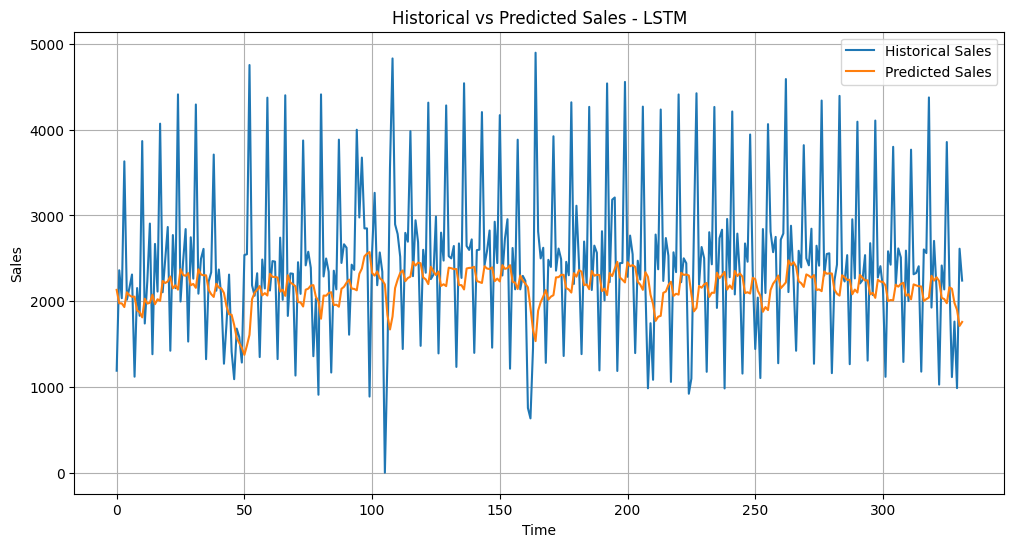

In [28]:
# Visualization- Plot historical sales and predicted sales

import matplotlib.pyplot as plt

def plot_historical_and_predicted_sales(model_name, y_true, y_pred):
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='Historical Sales')
    plt.plot(y_pred, label='Predicted Sales')
    plt.title(f'Historical vs Predicted Sales - {model_name}')
    plt.xlabel('Time')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_historical_and_predicted_sales("Naive Forecast", y_true, y_pred_naive)
plot_historical_and_predicted_sales("ARIMA", test, forecast)
plot_historical_and_predicted_sales("Random Forest", y_val, y_pred_rf)
plot_historical_and_predicted_sales("XGBoost", y_val, y_pred_xgb)
plot_historical_and_predicted_sales("LSTM", y_val_lstm_actual, y_pred_lstm)


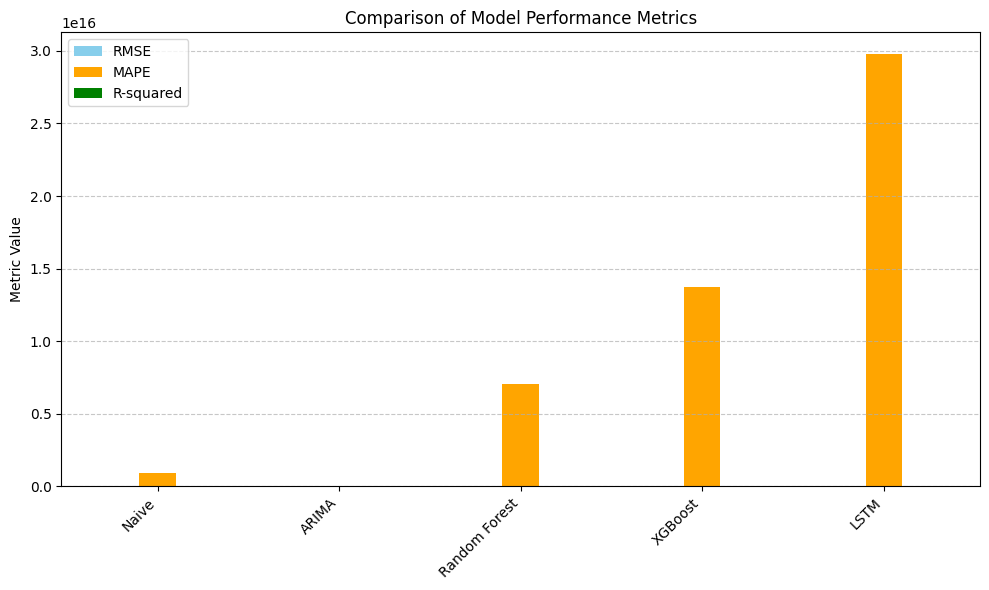

In [29]:
# Compare model performances using error metrics

import matplotlib.pyplot as plt
import numpy as np
def plot_model_comparison(results_df):
    plt.figure(figsize=(10, 6))
    models = results_df['Model']
    rmse = results_df['RMSE']
    mape = results_df['MAPE']
    r2 = results_df['R-squared']

    bar_width = 0.2

    plt.bar(np.arange(len(models)) - bar_width, rmse, width=bar_width, label='RMSE', color='skyblue')
    plt.bar(np.arange(len(models)), mape, width=bar_width, label='MAPE', color='orange')
    plt.bar(np.arange(len(models)) + bar_width, r2, width=bar_width, label='R-squared', color='green')


    plt.xticks(np.arange(len(models)), models, rotation=45, ha='right')
    plt.ylabel('Metric Value')
    plt.title('Comparison of Model Performance Metrics')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Assuming 'results' is the DataFrame with model evaluation metrics
results_df = results
plot_model_comparison(results_df)

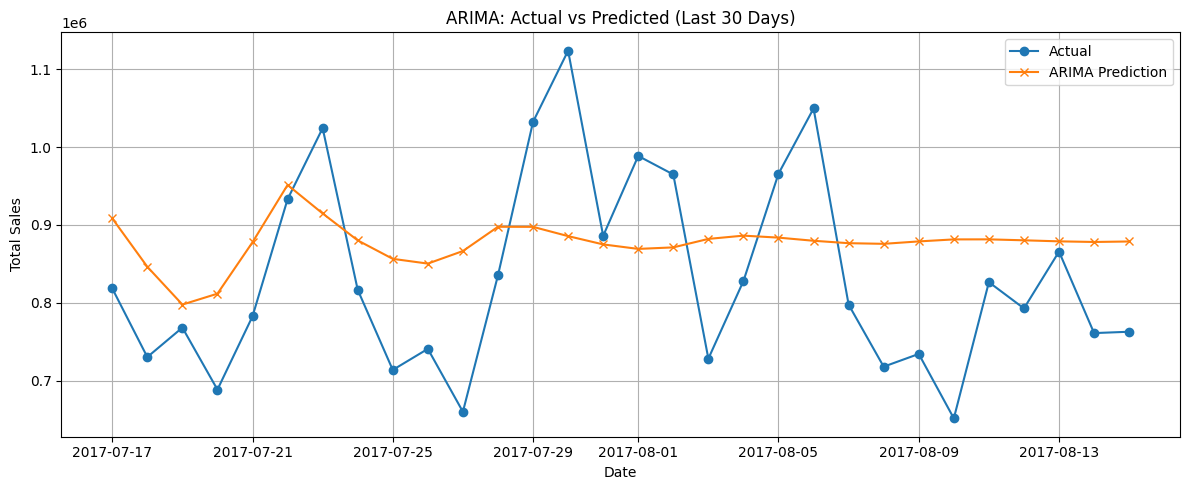

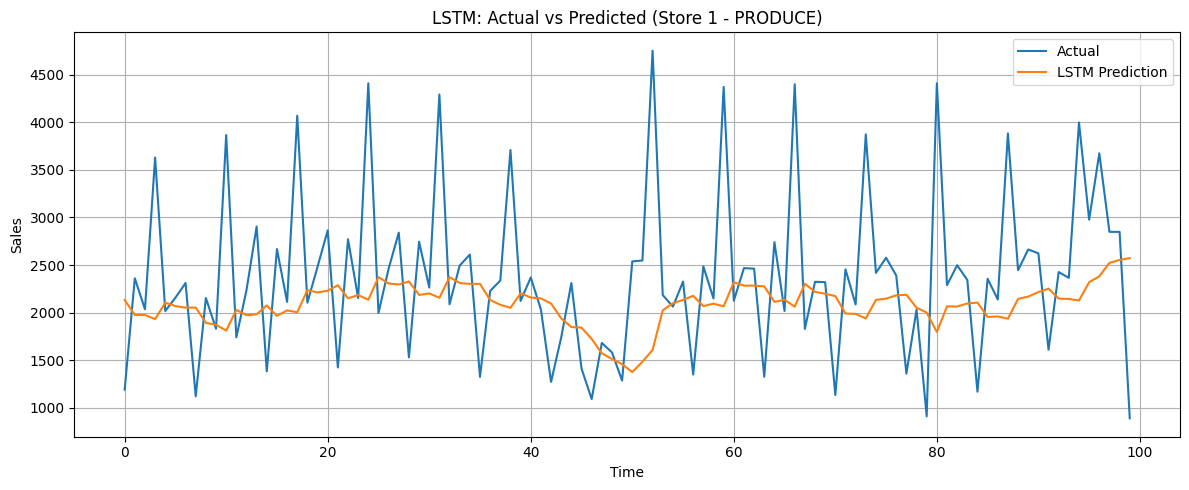

In [30]:
# For ARIMA
plt.figure(figsize=(12, 5))
plt.plot(test.index, test.values, label='Actual', marker='o')
plt.plot(test.index, forecast.values, label='ARIMA Prediction', marker='x')
plt.title('ARIMA: Actual vs Predicted (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# For LSTM (e.g., Store 1 - Produce)
plt.figure(figsize=(12, 5))
plt.plot(y_val_lstm_actual[:100], label='Actual')
plt.plot(y_pred_lstm[:100], label='LSTM Prediction')
plt.title('LSTM: Actual vs Predicted (Store 1 - PRODUCE)')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-31-22f1899ef2ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df, palette='magma')


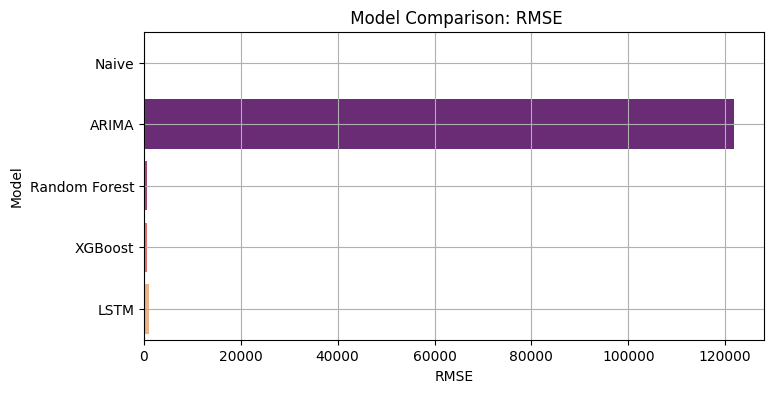

<ipython-input-31-22f1899ef2ca>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAPE', y='Model', data=results_df, palette='viridis')


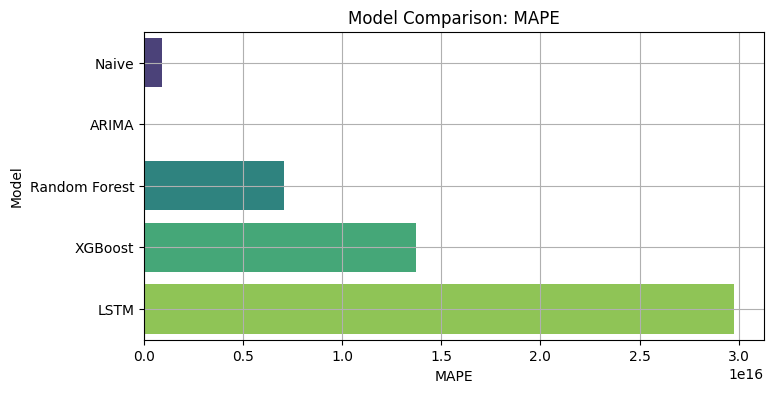

In [31]:
import seaborn as sns

# Bar plot: RMSE comparison
plt.figure(figsize=(8, 4))
sns.barplot(x='RMSE', y='Model', data=results_df, palette='magma')
plt.title(' Model Comparison: RMSE')
plt.grid(True)
plt.show()

# Bar plot: MAPE comparison
plt.figure(figsize=(8, 4))
sns.barplot(x='MAPE', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison: MAPE')
plt.grid(True)
plt.show()

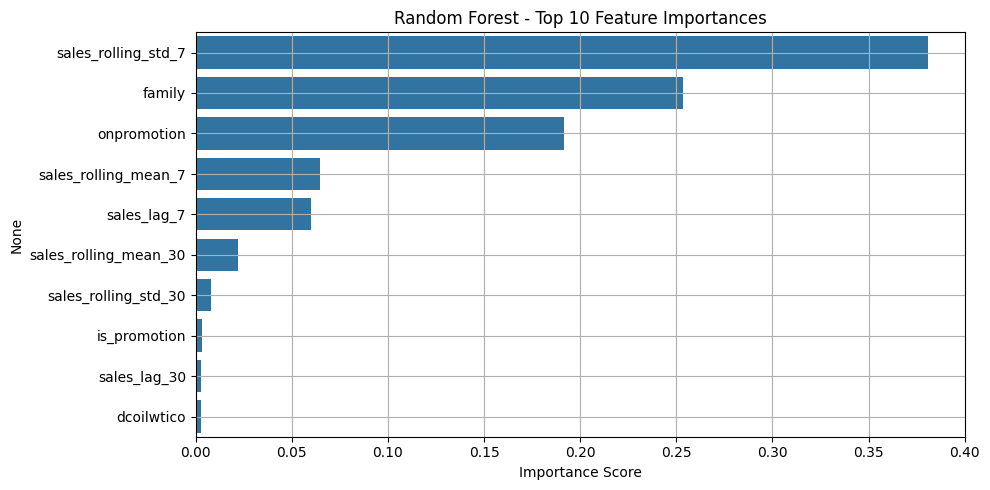

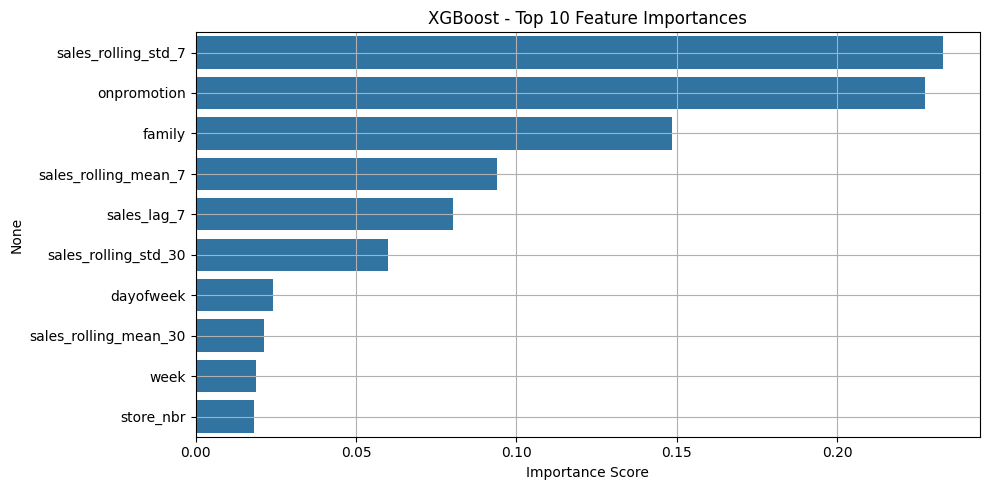

In [32]:
# Random Forest

original_features = rf_model.feature_names_in_

rf_feat_importance = pd.Series(rf_model.feature_importances_, index=original_features).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=rf_feat_importance.head(10), y=rf_feat_importance.head(10).index)
plt.title("Random Forest - Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# XGBoost
xgb_feat_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=xgb_feat_importance.head(10), y=xgb_feat_importance.head(10).index)
plt.title("XGBoost - Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()

After evaluating all five models (Naive, ARIMA, Random Forest, XGBoost, LSTM), we compared them using RMSE, MAPE, and R².

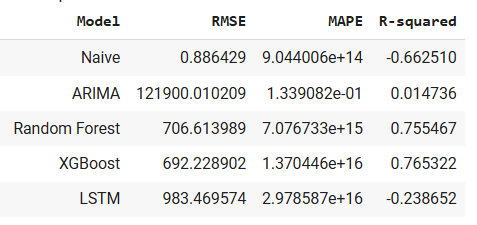

## Conclusion:

  XGBoost performed the best overall, with the lowest RMSE and highest R².
It effectively captured complex interactions between time-based, event-based, and aggregated features.

# Impact of External Factors:

* Holidays and Promotions caused noticeable sales spikes — both improved model accuracy.

* Oil Prices showed moderate influence, acting as a proxy for economic conditions.

* Paydays (15th & End) consistently boosted sales.

* The 2016 Earthquake caused a sharp dip — captured using a binary flag.

## Business Recommendations:

* Plan inventory ahead of holidays and paydays to avoid stock issues.

* Run promotions during slow seasons to boost demand.

* Tailor strategies by store cluster and top product families.

* Use a hybrid model (XGBoost + LSTM) for better short- and long-term forecasting.